In [90]:
import pandas as pd
import prince
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
X = pd.DataFrame(data=X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
y = pd.Series(y).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
X.head()

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
pca = prince.PCA(
...     n_components=2,
...     n_iter=3,
...     rescale_with_mean=True,
...     rescale_with_std=True,
...     copy=True,
...     check_input=True,
...     engine='auto',
...     random_state=42
... )
pca = pca.fit(X)

In [92]:
pca.transform(X).head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


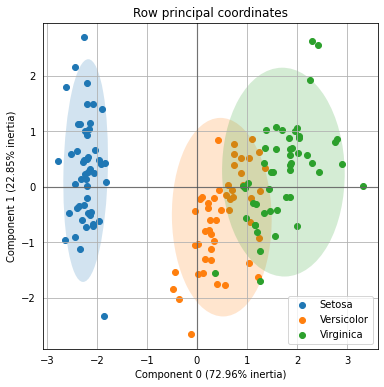

In [93]:
ax = pca.plot_row_coordinates(
...     X,
...     ax=None,
...     figsize=(6, 6),
...     x_component=0,
...     y_component=1,
...     labels=None,
...     color_labels=y,
...     ellipse_outline=False,
...     ellipse_fill=True,
...     show_points=True
... )
ax.get_figure().savefig('images/pca_row_coordinates.svg')

In [94]:
pca.explained_inertia_

array([0.72962445, 0.22850762])

pca.eigenvalues_

In [12]:
pca.total_inertia_

4.000000000000001

In [13]:
pca.explained_inertia_

array([0.72962445, 0.22850762])

In [14]:
pca.column_correlations(X)

,0,1
Petal length,0.991555,0.023415
Petal width,0.964979,0.064000
Sepal length,0.890169,0.360830
Sepal width,-0.460143,0.882716


In [15]:
pca.row_contributions(X).head()

,0,1
0,1.757369,0.252098
1,1.483777,0.497200
2,1.915225,0.127896
3,1.811606,0.390447
4,1.956947,0.457748


In [16]:
pca.inverse_transform(pca.transform(X)).head()

,0,1,2,3
0,5.018949,3.514854,1.466013,0.251922
1,4.738463,3.030433,1.603913,0.272074
2,4.720130,3.196830,1.328961,0.167414
3,4.668436,3.086770,1.384170,0.182247
4,5.017093,3.596402,1.345411,0.206706


# Correspondence analysis (CA)
You should be using correspondence analysis when you want to analyse a contingency table. In other words you want to analyse the dependencies between two categorical variables. The following example comes from section 17.2.3 of this textbook. It shows the number of occurrences between different hair and eye colors.

In [95]:
import pandas as pd

pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))
X = pd.DataFrame(
    data=[
        [326, 38, 241, 110, 3],
        [688, 116, 584, 188, 4],
        [343, 84, 909, 412, 26],
        [98, 48, 403, 681, 85]
    ],
    columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']),
    index=pd.Series(['Blue', 'Light', 'Medium', 'Dark'])
)
X

,Fair,Red,Medium,Dark,Black
Blue,326,38,241,110,3
Light,688,116,584,188,4
Medium,343,84,909,412,26
Dark,98,48,403,681,85


Unlike the PCA class, the CA only exposes scikit-learn's fit method.

In [96]:

import prince
ca = prince.CA(n_components=2,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)
X.columns.rename('Hair color', inplace=True)
X.index.rename('Eye color', inplace=True)
ca = ca.fit(X)

In [97]:
ca.row_coordinates(X)

,0,1
Blue,-0.400300,-0.165411
Light,-0.440708,-0.088463
Medium,0.033614,0.245002
Dark,0.702739,-0.133914


In [98]:
ca.column_coordinates(X)

,0,1
Fair,-0.543995,-0.173844
Red,-0.233261,-0.048279
Medium,-0.042024,0.208304
Dark,0.588709,-0.103950
Black,1.094388,-0.286437


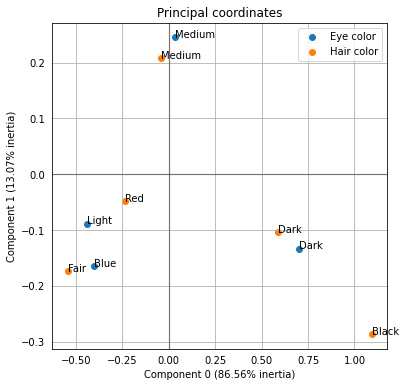

In [99]:
ax = ca.plot_coordinates(
...     X=X,
...     ax=None,
...     figsize=(6, 6),
...     x_component=0,
...     y_component=1,
...     show_row_labels=True,
...     show_col_labels=True
... )
ax.get_figure().savefig('images/ca_coordinates.svg')

In [100]:
ca.eigenvalues_

[0.19924475202819097, 0.030086774100411818]

In [101]:
ca.total_inertia_

0.23019100748666482

In [102]:
ca.explained_inertia_

[0.8655627090025808, 0.13070351630549587]

# Multiple correspondence analysis (MCA)
Multiple correspondence analysis (MCA) is an extension of correspondence analysis (CA). It should be used when you have more than two categorical variables. The idea is simply to compute the one-hot encoded version of a dataset and apply CA on it. As an example we're going to use the balloons dataset taken from the UCI datasets website.

In [103]:
import pandas as pd

X = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balloons/adult+stretch.data')
X.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
X.head()

,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,F
2,YELLOW,SMALL,DIP,ADULT,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T


In [48]:
import prince
mca = prince.MCA(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
)
mca = mca.fit(X)

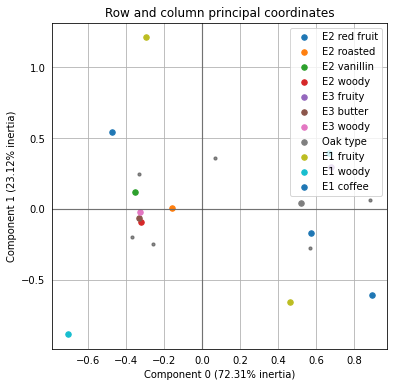

In [50]:
ax = mca.plot_coordinates(
...     X=X,
...     ax=None,
...     figsize=(6, 6),
...     show_row_points=True,
...     row_points_size=10,
...     show_row_labels=False,
...     #row_groups=None,
...     show_column_points=True,
...     column_points_size=30,
...     show_column_labels=False,
...     legend_n_cols=1
... )
ax.get_figure().savefig('images/mca_coordinates.svg')

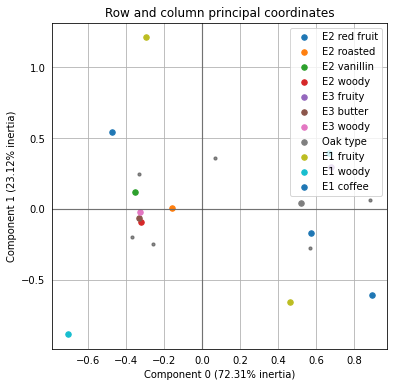

In [53]:
groups = ['CAT_A']*10+['CAT_B']*9
ax = mca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     #row_groups=groups,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
)
ax.get_figure().savefig('images/mca_coordinates_with_groups.svg')

In [54]:
mca.eigenvalues_

[0.19721592491900203, 0.06305717648295647]

In [55]:
mca.total_inertia_

0.2727272727272727

In [56]:
mca.explained_inertia_

[0.7231250580363409, 0.23120964710417374]

In [57]:
import pandas as pd

X = pd.DataFrame(
     data=[
         [1, 6, 7, 2, 5, 7, 6, 3, 6, 7],
         [5, 3, 2, 4, 4, 4, 2, 4, 4, 3],
         [6, 1, 1, 5, 2, 1, 1, 7, 1, 1],
         [7, 1, 2, 7, 2, 1, 2, 2, 2, 2],
         [2, 5, 4, 3, 5, 6, 5, 2, 6, 6],
         [3, 4, 4, 3, 5, 4, 5, 1, 7, 5]
     ],
     columns=['E1 fruity', 'E1 woody', 'E1 coffee',
              'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
              'E3 fruity', 'E3 butter', 'E3 woody'],
     index=['Wine {}'.format(i+1) for i in range(6)]
)
X['Oak type'] = [1, 2, 2, 2, 1, 1]

In [58]:
groups = {
...    'Expert #{}'.format(no+1): [c for c in X.columns if c.startswith('E{}'.format(no+1))]
...    for no in range(3)
... }
import pprint
pprint.pprint(groups)

{'Expert #1': ['E1 fruity', 'E1 woody', 'E1 coffee'],
 'Expert #2': ['E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody'],
 'Expert #3': ['E3 fruity', 'E3 butter', 'E3 woody']}


In [59]:
import prince
mfa = prince.MFA(
     groups=groups,
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
)
mfa = mfa.fit(X)

In [60]:
mfa.row_coordinates(X)

,0,1
Wine 1,-2.172155,-0.508596
Wine 2,0.557017,-0.197408
Wine 3,2.317663,-0.830259
Wine 4,1.832557,0.905046
Wine 5,-1.403787,0.054977
Wine 6,-1.131296,0.576241


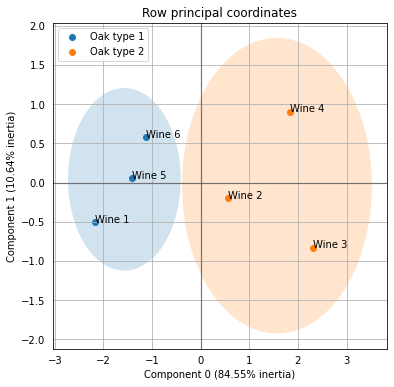

In [61]:
ax = mfa.plot_row_coordinates(
...     X,
...     ax=None,
...     figsize=(6, 6),
...     x_component=0,
...     y_component=1,
...     labels=X.index,
...     color_labels=['Oak type {}'.format(t) for t in X['Oak type']],
...     ellipse_outline=False,
...     ellipse_fill=True,
...     show_points=True
... )
ax.get_figure().savefig('images/mfa_row_coordinates.svg')

In [62]:
mfa.partial_row_coordinates(X)  # doctest: +NORMALIZE_WHITESPACE

Expert #1           Expert #2           Expert #3          
               0         1         0         1         0         1
Wine 1 -2.764432 -1.104812 -2.213928 -0.863519 -1.538106  0.442545
Wine 2  0.773034  0.298919  0.284247 -0.132135  0.613771 -0.759009
Wine 3  1.991398  0.805893  2.111508  0.499718  2.850084 -3.796390
Wine 4  1.981456  0.927187  2.393009  1.227146  1.123206  0.560803
Wine 5 -1.292834 -0.620661 -1.492114 -0.488088 -1.426414  1.273679
Wine 6 -0.688623 -0.306527 -1.082723 -0.243122 -1.622541  2.278372

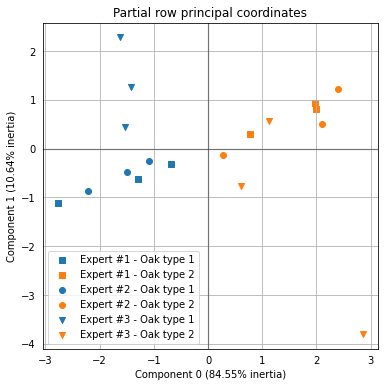

In [63]:
ax = mfa.plot_partial_row_coordinates(
...     X,
...     ax=None,
...     figsize=(6, 6),
...     x_component=0,
...     y_component=1,
...     color_labels=['Oak type {}'.format(t) for t in X['Oak type']]
... )
ax.get_figure().savefig('images/mfa_partial_row_coordinates.svg')

In [64]:
mfa.eigenvalues_

array([0.47246678, 0.05947651])

In [65]:
mfa.total_inertia_

0.5588340349908131

In [66]:
mfa.explained_inertia_

array([0.84545097, 0.10642965])

In [67]:
for name, fa in sorted(mfa.partial_factor_analysis_.items()):
...     print('{} eigenvalues: {}'.format(name, fa.eigenvalues_))

Expert #1 eigenvalues: [0.47709918 0.01997272]
Expert #2 eigenvalues: [0.60851399 0.03235984]
Expert #3 eigenvalues: [0.41341481 0.07353257]


In [68]:
mfa.row_contributions(X)

,0,1
Wine 1,9.986433,4.349104
Wine 2,0.656699,0.655218
Wine 3,11.369187,11.589968
Wine 4,7.107942,13.771950
Wine 5,4.170915,0.050817
Wine 6,2.708824,5.582943


In [69]:
mfa.column_correlations(X)

,0,1
E1 coffee,-0.918449,-0.043444
E1 fruity,0.968449,0.192294
E1 woody,-0.984442,-0.120198
E2 red fruit,0.887263,0.357632
E2 roasted,-0.955795,0.026039
E2 vanillin,-0.950629,-0.177883
E2 woody,-0.974649,0.127239
E3 butter,-0.945767,0.221441
E3 fruity,0.594649,-0.820777
E3 woody,-0.992337,0.029747


# Factor analysis of mixed data (FAMD)
A description is on it's way. This section is empty because I have to refactor the documentation a bit.

In [70]:
import pandas as pd

X = pd.DataFrame(
     data=[
         ['A', 'A', 'A', 2, 5, 7, 6, 3, 6, 7],
         ['A', 'A', 'A', 4, 4, 4, 2, 4, 4, 3],
         ['B', 'A', 'B', 5, 2, 1, 1, 7, 1, 1],
         ['B', 'A', 'B', 7, 2, 1, 2, 2, 2, 2],
         ['B', 'B', 'B', 3, 5, 6, 5, 2, 6, 6],
         ['B', 'B', 'A', 3, 5, 4, 5, 1, 7, 5]
     ],
     columns=['E1 fruity', 'E1 woody', 'E1 coffee',
              'E2 red fruit', 'E2 roasted', 'E2 vanillin', 'E2 woody',
              'E3 fruity', 'E3 butter', 'E3 woody'],
     index=['Wine {}'.format(i+1) for i in range(6)]
)
X['Oak type'] = [1, 2, 2, 2, 1, 1]

In [71]:
import prince
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
famd = famd.fit(X.drop('Oak type', axis='columns'))

In [72]:
famd.row_coordinates(X)

,0,1
Wine 1,-1.488689,-1.002711
Wine 2,-0.449783,-1.354847
Wine 3,1.774255,-0.258528
Wine 4,1.565402,0.016484
Wine 5,-0.349655,1.516425
Wine 6,-1.051531,1.083178


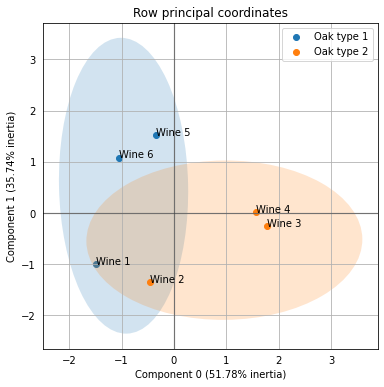

In [73]:
ax = famd.plot_row_coordinates(
...     X,
...     ax=None,
...     figsize=(6, 6),
...     x_component=0,
...     y_component=1,
...     labels=X.index,
...     color_labels=['Oak type {}'.format(t) for t in X['Oak type']],
...     ellipse_outline=False,
...     ellipse_fill=True,
...     show_points=True
... )
ax.get_figure().savefig('images/famd_row_coordinates.svg')